# Question 1

## (a)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

       A    B    C    D    type  Start assignment
0    6.4  2.9  4.3  1.3   amide                 1
1    5.7  4.4  1.5  0.4  phenol                 2
2    6.7  3.0  5.2  2.3   ether                 0
3    5.8  2.8  5.1  2.4   ether                 1
4    6.4  3.2  5.3  2.3   ether                 0
..   ...  ...  ...  ...     ...               ...
145  5.4  3.9  1.3  0.4  phenol                 1
146  6.3  2.5  5.0  1.9   ether                 0
147  6.0  3.4  4.5  1.6   amide                 0
148  6.2  2.9  4.3  1.3   amide                 0
149  5.6  3.0  4.1  1.3   amide                 0

[150 rows x 6 columns]


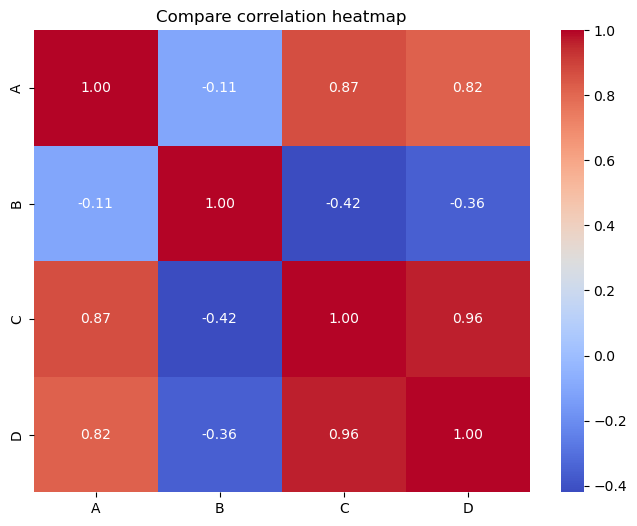

            A         B         C     D    type  Start assignment
0    0.810127  0.659091  0.623188  0.52   amide                 1
1    0.721519  1.000000  0.217391  0.16  phenol                 2
2    0.848101  0.681818  0.753623  0.92   ether                 0
3    0.734177  0.636364  0.739130  0.96   ether                 1
4    0.810127  0.727273  0.768116  0.92   ether                 0
..        ...       ...       ...   ...     ...               ...
145  0.683544  0.886364  0.188406  0.16  phenol                 1
146  0.797468  0.568182  0.724638  0.76   ether                 0
147  0.759494  0.772727  0.652174  0.64   amide                 0
148  0.784810  0.659091  0.623188  0.52   amide                 0
149  0.708861  0.681818  0.594203  0.52   amide                 0

[150 rows x 6 columns]


In [13]:
compounds_data = pd.read_csv('Datasets/compounds.csv')
print(compounds_data)
normalized_compounds = compounds_data.copy()
features = ['A', 'B', 'C', 'D']

for f in features:
    normalized_compounds.loc[:, f] = normalized_compounds.loc[:, f] / (normalized_compounds.loc[:, f].max())
    assert normalized_compounds.loc[:, f].all() <= 1 and normalized_compounds.loc[:, f].all() > 0
mat = normalized_compounds.iloc[:, 0:4].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Compare correlation heatmap")
plt.show()

print(normalized_compounds)

### (a) I generated a heatmap above to compare the correlation of features.  It seems that the highest correlations (in red/orange) are: 
- A: with C, D
- B: independent, if not negatively correlated
- C: with A, D
- D: with A, C

A, C, and D are very correlated.  B is not.

# (b)

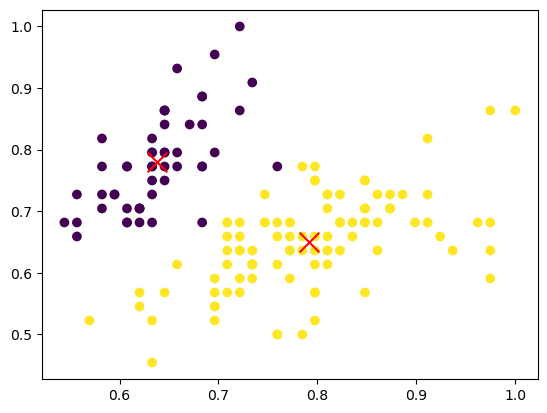

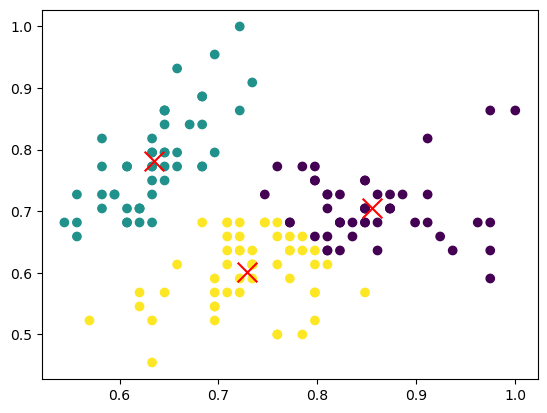

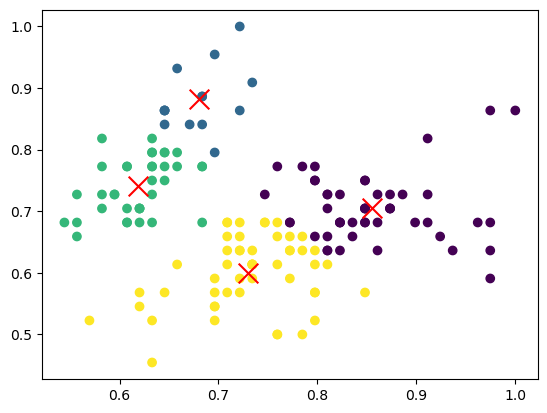

In [29]:
from sklearn.cluster import KMeans

for i in range(2, 5):
    kmeans = KMeans(i).fit(normalized_compounds.iloc[:, 0:2])

    plt.scatter(normalized_compounds['A'], normalized_compounds['B'], c=kmeans.labels_)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.show()

# (b)
k=3 seems to make the most sense.  k = 2 seems to erroneously group together points that have way too much variance (bottom cluster).  k = 4 seems to erroneously split the upper points into two clusters.

# (c)

In [ ]:
plt.scatter(normalized_compounds.loc[:, 'A'], normalized_compounds.loc[:, ''])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Note: you can modify the template, define new attributes or functions as you want
class NaiveBayesClassifier():
    def __init__(self):
        # classes
        self.cls = []
        # statistics of features that belongs to different classes
        self.cls_stats = []
        # prior probablity, i.e. P(C)
        self.prior_prob = []
        
        self.trained = False
    
    @staticmethod
    def gaussian(X, mean, std):
        """
        Gaussain probability distribution function
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        mean: numpy.ndarray
            Average of each feature, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature, shape (n_features,)
            
        Returns
        -------
        prob: numpy.ndarray
            Probability of each feature, shape (n_samples, n_features)
        """
        return ...
    
    @staticmethod
    def calculate_statistics(X):
        """
        Calculate the average and standard deviation of each feature based on the input data
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
            
        Returns
        -------
        mean: numpy.ndarray
            Average of each feature, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature, shape (n_features,)
        """
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        return mean, std
    
    @staticmethod
    def calculate_prob(X, mean, std):
        """
        Calculate the prior probability that the input features belong to a specific class,
        i.e. P(X | C) = \prod_i P(X_i | C)
        which is defined by the statistics of features in that class.
        
        Gaussain probability distribution function
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        mean: numpy.ndarray
            Average of each feature in the speific class, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature in the specific class, shape (n_features,)
            
        Returns
        -------
        prob: numpy.ndarray
            Probability that the features belong to a spcefic class, shape (n_samples,)
        """
        ...
        return ...
    
    def fit(self, X, y):
        """
        Train the classifier by calculating the statistics of different features in each class
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        y: numpy.ndarray
            Labels (the actual classes), shape (n_samples)
        """
        ndata = y.shape[0]
        self.cls = np.unique(y)
        for i in range(len(self.cls)):
            cls_filter = (y == self.cls[i])
            self.prior_prob.append(...)
            self.cls_stats.append(...)
        self.trained = True
            
    def predict(self, X):
        # Do the prediction by outputing the class that has highest probability
        assert self.trained, f"The classfier has not been trained. Call {self.__class__.__name__}.fit first"
        probs = []
        for i in range(len(self.cls)):
            probs.append(...)
        return self.cls[np.argmax(probs, axis=0)]

## (b)

Preprocess data:
+ Select relevant descriptors (columns other than "Start assignment" and "ranking"). Should get *178 datapoints and 13 features*.
+ Normalize the data with `StandardScaler` in sklearn.
+ The labels are in the "ranking" column.

*For debugging*: The accuracy could reach over 95\%.

In [ ]:
def calculate_accuracy(model, X, y):
    y_pred = model.predict(X)
    acc = np.sum(y_pred == y) / len(y)
    return acc

def KFoldNaiveBayes(k, X, y):
    """
    K-Fold Cross Validation for Naive Bayes Classifier
    
    Parameters
    ---------
    k: int
        Number of folds
    X: numpy.ndarray
        Input data, shape (n_samples, n_features)
    y: numpy.ndarray
        Class labels, shape (n_samples)
    """
    kf = ...
    train_acc_all = []
    test_acc_all = []
    for train_index, test_index in ...:
        X_train, X_test = ...
        y_train, y_test = ...
        
        model = ...
        
        # Report prediction accuracy for this fold
        # use the calculate_accuracy() function
        train_acc = ...
        train_acc_all.append(train_acc)
        test_acc = ...
        test_acc_all.append(test_acc)
        print("Train accuracy:", train_acc)
        print("Test accuracy:", test_acc)
    
    # report mean & std for the training/testing accuracy
    print("Final results:")
    print("Training accuracy:", ...)
    print("Testing  accuracy:", ...)

# Question 3

## (a)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# Define your model here

## (b)

*For debugging*: The accuracy could reach over 95\% if the hyperparamters are tuned properly.

In [ ]:
def train_and_val(model, X_train, y_train, epochs, draw_curve=True):
    """
    Further split the data into acutal train and validation subsets.
    """
    # Define your loss function, optimizer
    loss_func = ...
    optimizer = ...
    
    X_train_in, X_val, y_train_in, y_val = ...
    
    val_losses = []
    lowest_val_loss = np.inf
    
    weights = {}
    for i in range(epochs):
        # Compute the loss and do back-propagation
        y_train_pred = model(X_train_in)
        loss = loss_func(y_train_pred, y_train_in)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Compute validation loss and keep track of the lowest val loss
        with torch.no_grad():
            val_loss = ...
        
        if val_loss < lowest_val_loss:
            lowest_val_loss = val_loss
            weights = model.state_dict() 
        val_losses.append(val_loss)
        
    # The final number of epochs is when the minimum error in validation set occurs    
    final_epochs = np.argmin(val_losses)
    print("Number of epochs with lowest validation:", final_epochs)
    print(f"Validation loss: {np.min(val_losses)}")
    # Recover the model weights
    model.load_state_dict(weights)

    if draw_curve:
        fig, ax = plt.subplots(1, 1, figsize=(5, 4), constrained_layout=True)
        ax.plot(np.arange(epochs), val_losses, label='Validation loss')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.legend()
    
    return model


def calculate_accuracy_nn(model, X, y):
    with torch.no_grad():
        y_pred = torch.argmax(model(X), axis=1)
        acc = torch.sum(y_pred == y) / len(y)
    return acc.detach().numpy()


def KFoldNN(k, X, y, epochs=500):
    """
    K-Fold Validation for Neural Network
    
    Parameters
    ---------
    k: int
        Number of folds
    X: numpy.ndarray
        Input data, shape (n_samples, n_features)
    y: numpy.ndarray
        Class labels, shape (n_samples)
    epochs: int
        Number of epochs during training
    """
    # K-Fold
    kf = ...
    train_acc_all = []
    test_acc_all = []
    for train_index, test_index in ...:
        X_train, X_test = ...
        y_train, y_test = ...
        
        # further do a train/valid split on X_train
        model = ...
        
        # Report prediction accuracy for this fold
        # use calculate_accuracy_nn() function
        train_acc = ...
        train_acc_all.append(train_acc)
        test_acc = ...
        test_acc_all.append(test_acc)
        print("Train accuracy:", train_acc)
        print("Test accuracy:", test_acc)
    
    # report mean & std for the training/testing accuracy
    print("Final results:")
    print("Training accuracy:", ...)
    print("Testing  accuracy:", ...)